# General tasks and directions

- Add your name, today's date, and the assignment title to the designated cell.
- Write your answers in the cells that contain `Add your answer here.` line.
- Write your code in the cells that contain `# Add your implementation here.` line.
- Use autograder tests that are provided for your convenience.
- Don't change or delete any provided code (including [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) such as `%%capture output`).


## Add your name, today's date, and the assignment title

author: Muhammad Mughees Warraich

date: Apr 20

assignment: exercise 5 


# Exercise 5

Working with time series

This assignment is individual and you agree to submit your own work.


In [299]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
from zipfile import ZipFile
from pandas import Series, DataFrame
from pandas.tseries.offsets import Day


## Task 1

Read historical share prices of the [Big Tech](https://en.wikipedia.org/wiki/Big_Tech) companies from the provided file *big_tech.zip* into a single `DataFrame`.

The resulting `DataFrame` must have the following properties:

- index must be of type `DatetimeIndex` with the frequency set to `BusinessDay`
- column names must be the tickers of the companies ("AAPL", "AMZN", "GOOG", "META", and "MSFT")
- second-level column names must be `Close` and `Volume`
- column values must be the closing (`Close`) share price and the volume (`Volume`) of trade

From now on the *company share price* refers to the *company share price at the end (close) of the day*.

[zipfile — Work with ZIP archives — Python 3.11.3 documentation](https://docs.python.org/3/library/zipfile.html)

[Save Pandas Dataframe Table as a PNG | Delft Stack](https://www.delftstack.com/howto/python-pandas/pandas-png/)

![Task 1](task1.png)

In [300]:
# Add your implementation here.
import zipfile
with zipfile.ZipFile('big_tech.zip', 'r') as zip_ref:
    zip_ref.extractall('temp')

dfs = []
for ticker in ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT']:
    df = pd.read_csv(f'temp/{ticker}.csv', index_col=0, parse_dates=True)
    df = df[['Close', 'Volume']]
    df.columns = pd.MultiIndex.from_product([[ticker], df.columns])
    dfs.append(df)

df = pd.concat(dfs, axis=1)
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B') 
df = df.reindex(date_range)
df.columns.names = ['Ticker', 'Attribute']
df.index.freq = 'B'
df = df.where(pd.notnull(df), None)
df.index.name = "Date" 


In [301]:
df.tail()

Ticker            AAPL                    AMZN                    GOOG  \
Attribute        Close      Volume       Close      Volume       Close   
Date                                                                     
2023-04-06  164.660004  45390100.0  102.059998  43808000.0  108.900002   
2023-04-07         NaN         NaN         NaN         NaN         NaN   
2023-04-10  162.029999  47716900.0  102.169998  37261200.0  106.949997   
2023-04-11  160.800003  47644200.0   99.919998  60417800.0  106.120003   
2023-04-12  160.100006  50072700.0   97.830002  56639400.0  105.220001   

Ticker                        META                    MSFT              
Attribute       Volume       Close      Volume       Close      Volume  
Date                                                                    
2023-04-06  34684200.0  216.100006  26104400.0  291.600006  29770300.0  
2023-04-07         NaN         NaN         NaN         NaN         NaN  
2023-04-10  19741500.0  214.750000  16106100.0  289.390015  23103000.0  
2023-04-11  18721300.0  213.850006  16710100.0  282.829987  27276600.0  
2023-04-12  22742600.0  214.000000  18859900.0  283.489990  27373400.0

In [302]:
assert df.shape == (11044, 10)

In [303]:
assert df.columns.equals(pd.MultiIndex.from_arrays(
    [["AAPL", "AAPL", "AMZN", "AMZN", "GOOG", "GOOG", "META", "META", "MSFT", "MSFT"],
     ["Close", "Volume", "Close", "Volume", "Close", "Volume", "Close", "Volume", "Close", "Volume"]])
                        )

In [304]:
assert df.index.name == "Date"

In [305]:
assert isinstance(df.index.freq, pd.tseries.offsets.BusinessDay)

In [306]:
assert isinstance(df.index, pd.DatetimeIndex)

In [307]:
df

Ticker            AAPL                     AMZN                    GOOG  \
Attribute        Close       Volume       Close      Volume       Close   
Date                                                                      
1980-12-12    0.128348  469033600.0         NaN         NaN         NaN   
1980-12-15    0.121652  175884800.0         NaN         NaN         NaN   
1980-12-16    0.112723  105728000.0         NaN         NaN         NaN   
1980-12-17    0.115513   86441600.0         NaN         NaN         NaN   
1980-12-18    0.118862   73449600.0         NaN         NaN         NaN   
...                ...          ...         ...         ...         ...   
2023-04-06  164.660004   45390100.0  102.059998  43808000.0  108.900002   
2023-04-07         NaN          NaN         NaN         NaN         NaN   
2023-04-10  162.029999   47716900.0  102.169998  37261200.0  106.949997   
2023-04-11  160.800003   47644200.0   99.919998  60417800.0  106.120003   
2023-04-12  160.100006   50072700.0   97.830002  56639400.0  105.220001   

Ticker                        META                    MSFT              
Attribute       Volume       Close      Volume       Close      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-04-06  34684200.0  216.100006  26104400.0  291.600006  29770300.0  
2023-04-07         NaN         NaN         NaN         NaN         NaN  
2023-04-10  19741500.0  214.750000  16106100.0  289.390015  23103000.0  
2023-04-11  18721300.0  213.850006  16710100.0  282.829987  27276600.0  
2023-04-12  22742600.0  214.000000  18859900.0  283.489990  27373400.0  

[11044 rows x 10 columns]

## Task 2

Display the historical share price of each company since 2018 as a *line*.

Include the 100-day average *line* as part of each plot.

Plots must share both `x` and `y` axes.

[python 3.x - pandas multiindex - how to select second level when using columns? - Stack Overflow](https://stackoverflow.com/questions/45128523/pandas-multiindex-how-to-select-second-level-when-using-columns)

![Task 2](task2.png)

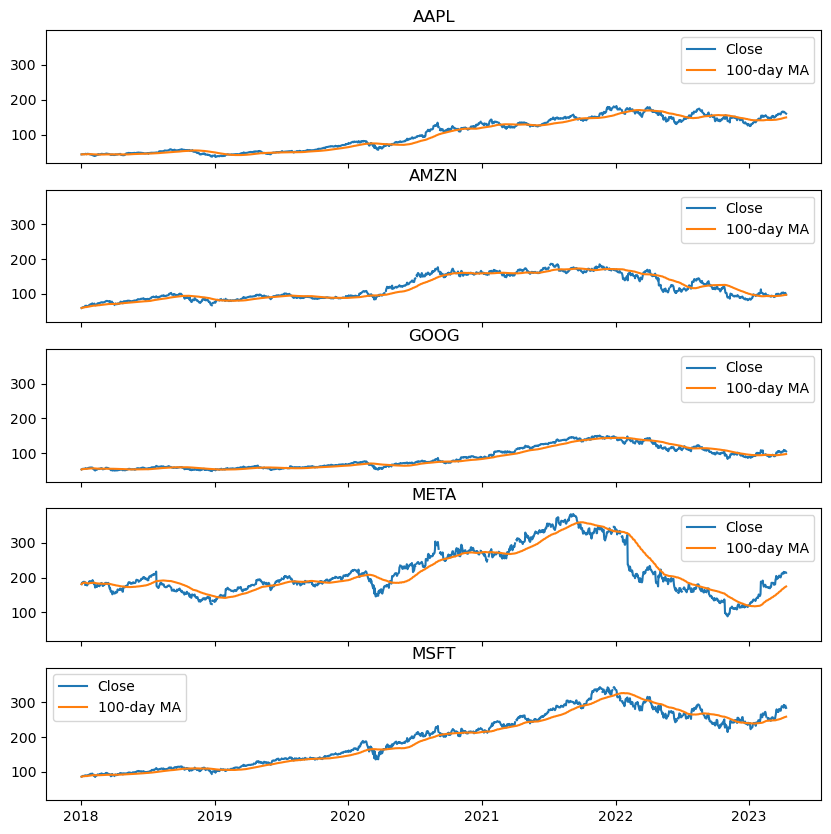

In [308]:
df1 = df.T
df1.index.names = ['Company', 'Attribute']
df1.columns = pd.to_datetime(df1.columns)

df1 = df1[df1.columns[df1.columns >= '2018-01-01']]

ma = df1.rolling(window='100D', axis=1).mean()


fig, axs = plt.subplots(len(df1.index.levels[0]), 1, sharex=True, sharey=True, figsize=(10, 10))
for i, company in enumerate(df1.index.levels[0]):
    ax = axs[i]
    ax.plot(df1.loc[company].columns, df1.loc[company, 'Close'], label='Close')
    ax.plot(df1.loc[company].columns, ma.loc[company, 'Close'], label='100-day MA')
    ax.set_title(company)
    ax.legend()

plt.show()


## Task 3

Display volume of traded shares of all companies as a *stacked bar chart*, grouped by decade (1970s, 1980s, 1990s, 2000s, 2010s, and 2020s).

Note that the 70s end in December of 1980.

![Task 3](task3.png)

In [309]:
df

Company           AAPL                     AMZN                    GOOG  \
Attribute        Close       Volume       Close      Volume       Close   
Date                                                                      
1980-12-12    0.128348  469033600.0         NaN         NaN         NaN   
1980-12-15    0.121652  175884800.0         NaN         NaN         NaN   
1980-12-16    0.112723  105728000.0         NaN         NaN         NaN   
1980-12-17    0.115513   86441600.0         NaN         NaN         NaN   
1980-12-18    0.118862   73449600.0         NaN         NaN         NaN   
...                ...          ...         ...         ...         ...   
2023-04-06  164.660004   45390100.0  102.059998  43808000.0  108.900002   
2023-04-07         NaN          NaN         NaN         NaN         NaN   
2023-04-10  162.029999   47716900.0  102.169998  37261200.0  106.949997   
2023-04-11  160.800003   47644200.0   99.919998  60417800.0  106.120003   
2023-04-12  160.100006   50072700.0   97.830002  56639400.0  105.220001   

Company                       META                    MSFT              
Attribute       Volume       Close      Volume       Close      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-04-06  34684200.0  216.100006  26104400.0  291.600006  29770300.0  
2023-04-07         NaN         NaN         NaN         NaN         NaN  
2023-04-10  19741500.0  214.750000  16106100.0  289.390015  23103000.0  
2023-04-11  18721300.0  213.850006  16710100.0  282.829987  27276600.0  
2023-04-12  22742600.0  214.000000  18859900.0  283.489990  27373400.0  

[11044 rows x 10 columns]

In [310]:
df_grouped

Date
1980
1990
2000
2010
2020


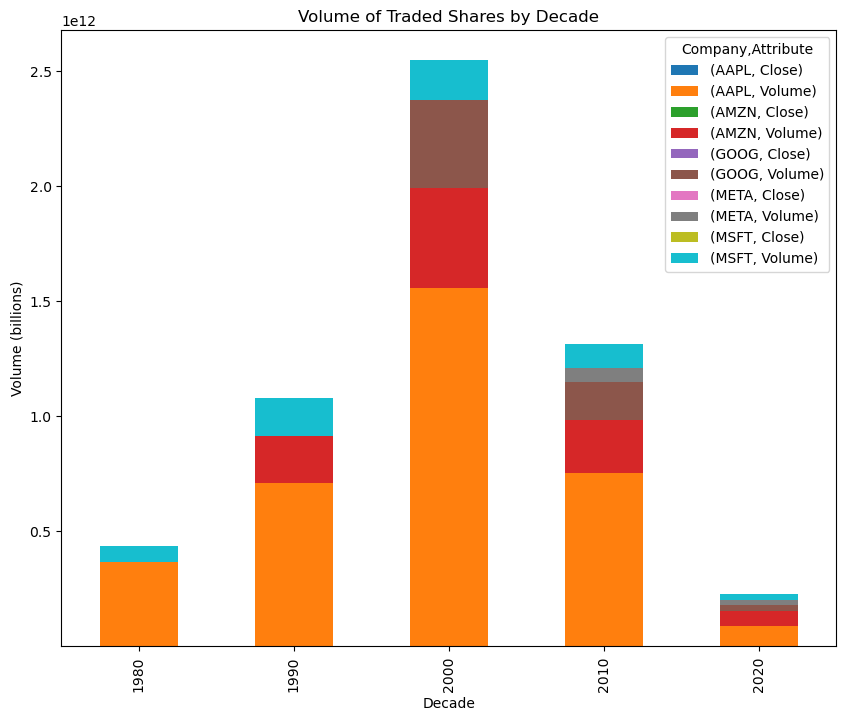

In [311]:
df_grouped = df.groupby(df.index.year // 10 * 10).sum()

ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.set_title('Volume of Traded Shares by Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Volume (billions)')

plt.show()

## Task 4

Display daily change of the *Meta*'s share price since 2020.

Highlight *extreme* changes (more than 5%) in red.

You must hide `xticks` as there are too many days in the chosen range.

[python - How to remove xticks from a plot - Stack Overflow](https://stackoverflow.com/questions/12998430/how-to-remove-xticks-from-a-plot)

[python - Color matplotlib bar chart based on value - Stack Overflow](https://stackoverflow.com/questions/33476401/color-matplotlib-bar-chart-based-on-value)

![Task 4](task4.png)


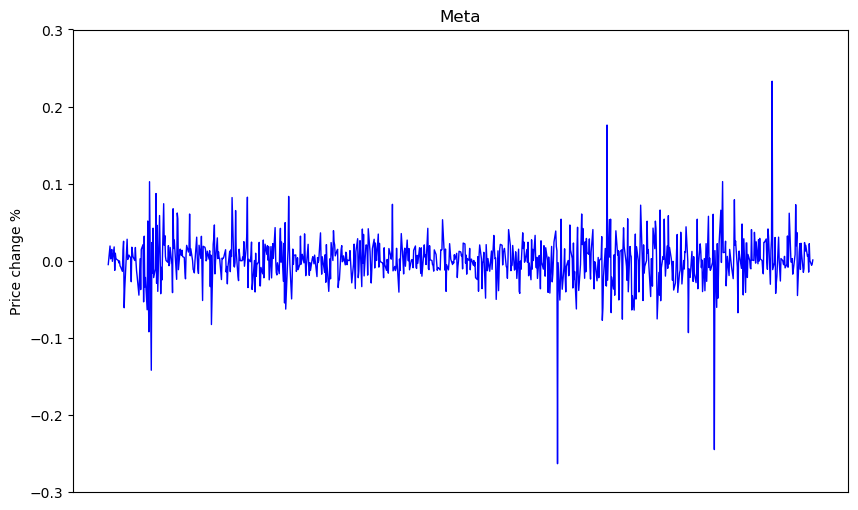

In [322]:
# Add your implementation here.
df2 = df
df2 = df.T
df2.index.names = ['Company', 'Attribute']
df2.columns = pd.to_datetime(df2.columns)

df2 = df2.loc[('META', 'Close'), df2.columns[df2.columns >= '2020-01-01']]

pct_change = df2.pct_change()

cc=['colors']*len(pct_change)
for n, val in enumerate(pct_change):
    if val<0:
        cc[n]='blue'
    elif val>=0:
        cc[n]='red'
        
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(pct_change.index, pct_change.values, 'b-', linewidth=1,)

ax.set_ylim(-0.30, 0.30)

ax.set_xticks([])
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax.set_title("Meta")
ax.set_ylabel('Price change %')

plt.show()

In [313]:
df2

Date
2020-01-01           NaN
2020-01-02    209.779999
2020-01-03    208.669998
2020-01-06    212.600006
2020-01-07    213.059998
                 ...    
2023-04-06    216.100006
2023-04-07           NaN
2023-04-10    214.750000
2023-04-11    213.850006
2023-04-12    214.000000
Freq: B, Name: (META, Close), Length: 856, dtype: float64

## Task 5

Display the share price of *Apple* since 2018.

The figure must contain the 30-days rolling average as a *line*.

The figure must highlight 2023 (starting with 2023-01-01) as a color *below* the rolling average line.

[python - How to plot a rectangle on a datetime axis using matplotlib? - Stack Overflow](https://stackoverflow.com/questions/31162780/how-to-plot-a-rectangle-on-a-datetime-axis-using-matplotlib)

[fill_between(x, y1, y2) — Matplotlib 3.7.1 documentation](https://matplotlib.org/stable/plot_types/basic/fill_between.html)

![Task 5](task5.png)

In [314]:
df

Company           AAPL                     AMZN                    GOOG  \
Attribute        Close       Volume       Close      Volume       Close   
Date                                                                      
1980-12-12    0.128348  469033600.0         NaN         NaN         NaN   
1980-12-15    0.121652  175884800.0         NaN         NaN         NaN   
1980-12-16    0.112723  105728000.0         NaN         NaN         NaN   
1980-12-17    0.115513   86441600.0         NaN         NaN         NaN   
1980-12-18    0.118862   73449600.0         NaN         NaN         NaN   
...                ...          ...         ...         ...         ...   
2023-04-06  164.660004   45390100.0  102.059998  43808000.0  108.900002   
2023-04-07         NaN          NaN         NaN         NaN         NaN   
2023-04-10  162.029999   47716900.0  102.169998  37261200.0  106.949997   
2023-04-11  160.800003   47644200.0   99.919998  60417800.0  106.120003   
2023-04-12  160.100006   50072700.0   97.830002  56639400.0  105.220001   

Company                       META                    MSFT              
Attribute       Volume       Close      Volume       Close      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-04-06  34684200.0  216.100006  26104400.0  291.600006  29770300.0  
2023-04-07         NaN         NaN         NaN         NaN         NaN  
2023-04-10  19741500.0  214.750000  16106100.0  289.390015  23103000.0  
2023-04-11  18721300.0  213.850006  16710100.0  282.829987  27276600.0  
2023-04-12  22742600.0  214.000000  18859900.0  283.489990  27373400.0  

[11044 rows x 10 columns]

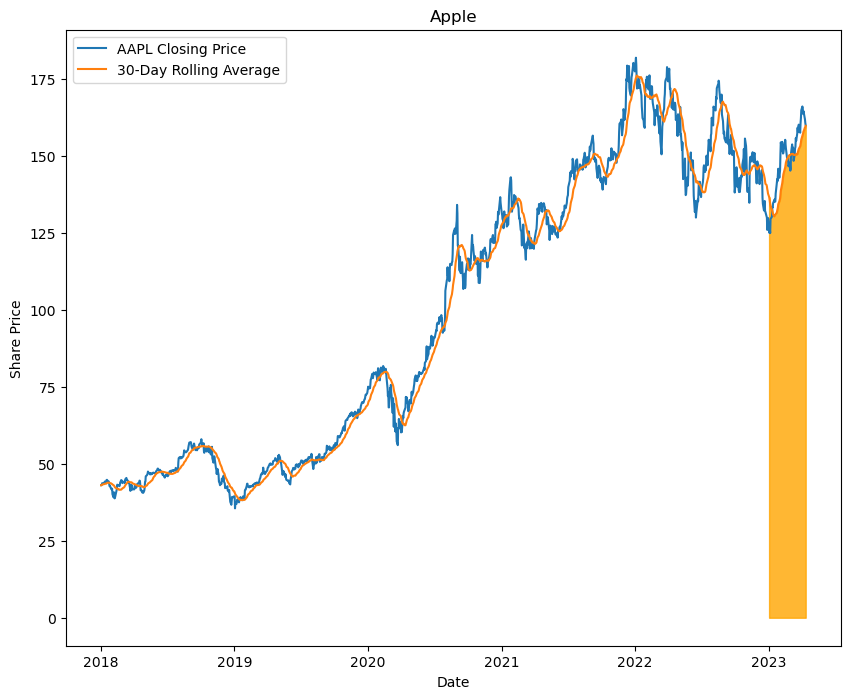

In [315]:
# Add your implementation here.
AApl_data = df['AAPL'].loc['2018':]
rolling_avg = AApl_data['Close'].rolling('30D').mean()
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=AApl_data['Close'], label='AAPL Closing Price', ax=ax)
sns.lineplot(data=rolling_avg, label='30-Day Rolling Average', ax=ax)

highlight_start = '2023-01-01'
highlight_end = '2023-12-31'

ax.fill_between(rolling_avg.loc[highlight_start:highlight_end].index,
                rolling_avg.loc[highlight_start:highlight_end].values,
                color='orange', alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Share Price')
ax.set_title('Apple')
ax.legend()

plt.show()

## Submission Checklist

- [ ] Your name, today's date, and the assignment title in the designated cell.
- [ ] Your answers in the designated cells (if required).
- [ ] Your code runs and produces the expected output.
- [ ] The validity of your code is verified by autograders (if provided).
- [ ] Restart the kernel and run all cells (in the menubar, select *Kernel*, then *Restart Kernel and Run All Cells*).
- [ ] Save the notebook.
- [ ] Submit the assignment.
